In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.optim as optim

trainset = torchvision.datasets.FashionMNIST(
    root = './data/', train = True,
    download = True ,
    transform = transforms.ToTensor()
)

100%|██████████| 26421880/26421880 [00:08<00:00, 3098741.11it/s]


Extracting ./data/FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data/FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 104685.58it/s]


Extracting ./data/FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data/FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:03<00:00, 1453841.94it/s]


Extracting ./data/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data/FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST\raw



In [4]:
batch_size = 4
trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle = True)

In [6]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(images[0].shape)
print(labels[0].item())

torch.Size([4, 1, 28, 28])
torch.Size([1, 28, 28])
7


In [32]:
# 이미지 데이터를 출력하기 위한 전처리
def imshow(img, title):
    plt.figure(figsize = (batch_size * 4, 4))
    plt.axis('off')
    plt.imshow(img)
    plt.title(title)
    plt.show()

In [33]:
# 이미지 데이터 출력 함수
def show_batch_images(dataloader):
    images, labels = next(iter(dataloader))
    
    img = torchvision.utils.make_grid(images)
    np_img = img.numpy()
    np_img  = np.transpose(np_img , (1, 2, 0))
    imshow(np_img, title = [str(x.item()) for x in labels])
    
    return images, labels

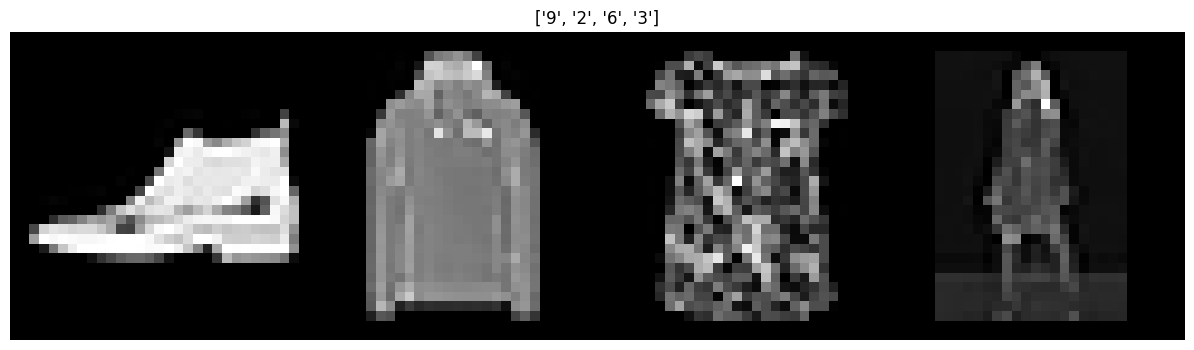

In [34]:
images, labels = show_batch_images(trainloader)

In [35]:
class NormalNet(nn.Module):
    def __init__(self):
        super(NormalNet, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(784, 48),
            nn.ReLU(),
            nn.Linear(48, 24),
            nn.ReLU(),
            nn.Linear(24, 10)
        )
        
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [36]:
class BNet(nn.Module):
    def __init__(self):
        super(BNet, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(784, 48),
            nn.BatchNorm1d(48),
            nn.ReLU(),
            nn.Linear(48, 24),
            nn.BatchNorm1d(24),
            nn.ReLU(),
            nn.Linear(24, 10),
        )
    
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [37]:
model = NormalNet()
print(model)

NormalNet(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=48, bias=True)
    (1): ReLU()
    (2): Linear(in_features=48, out_features=24, bias=True)
    (3): ReLU()
    (4): Linear(in_features=24, out_features=10, bias=True)
  )
)


In [38]:
model_bn = BNet()
print(model_bn)

BNet(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=48, bias=True)
    (1): BatchNorm1d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=48, out_features=24, bias=True)
    (4): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=24, out_features=10, bias=True)
  )
)


In [39]:
batch_size = 512
trainloader = torch.utils.data.DataLoader(trainset, batch_size= batch_size, shuffle = True)

In [40]:
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(model.parameters(), lr = 0.01)
opt_bn = optim.SGD(model_bn.parameters(), lr = 0.01)

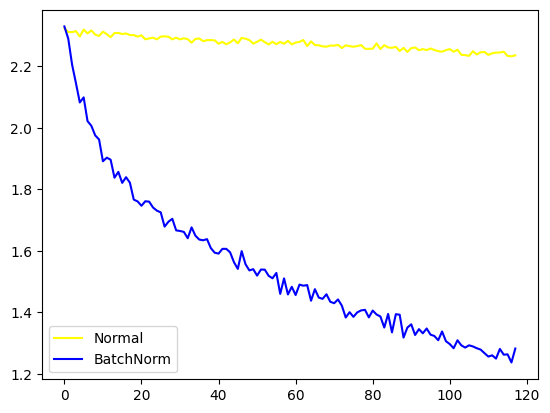

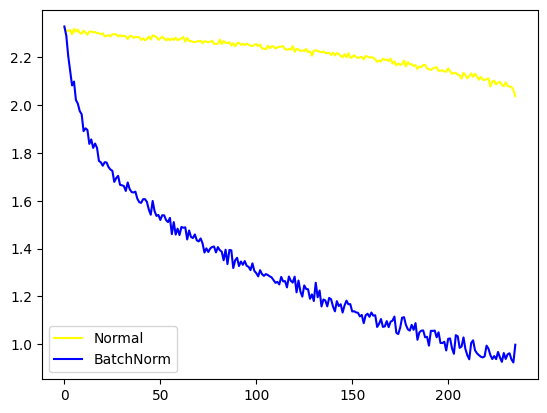

In [41]:
loss_arr = []
loss_bn_arr = []
max_epochs = 2

for epoch in range(max_epochs):
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        opt.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        opt_bn.zero_grad()
        outputs_bn = model_bn(inputs)
        loss_bn = loss_fn(outputs_bn, labels)
        loss_bn.backward()
        opt_bn.step()
        
        loss_arr.append(loss.item())
        loss_bn_arr.append(loss_bn.item())
        
    plt.plot(loss_arr, 'yellow', label = 'Normal')
    plt.plot(loss_bn_arr, 'blue', label = 'BatchNorm')
    plt.legend()
    plt.show()

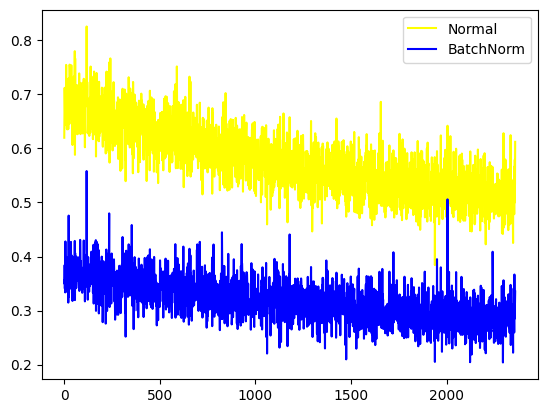

In [43]:
loss_arr = []
loss_bn_arr = []
max_epochs = 20

for epoch in range(max_epochs):
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        opt.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        opt_bn.zero_grad()
        outputs_bn = model_bn(inputs)
        loss_bn = loss_fn(outputs_bn, labels)
        loss_bn.backward()
        opt_bn.step()
        
        loss_arr.append(loss.item())
        loss_bn_arr.append(loss_bn.item())
        
plt.plot(loss_arr, 'yellow', label = 'Normal')
plt.plot(loss_bn_arr, 'blue', label = 'BatchNorm')
plt.legend()
plt.show()

In [45]:
N = 50
noise = 0.3

x_train = torch.unsqueeze(torch.linspace(-1, 1, N), 1)
y_train = x_train + noise * torch.normal(torch.zeros(N, 1), torch.ones(N, 1))

x_test = torch.unsqueeze(torch.linspace(-1, 1, N), 1)
y_test = x_test + noise * torch.normal(torch.zeros(N, 1), torch.ones(N, 1))

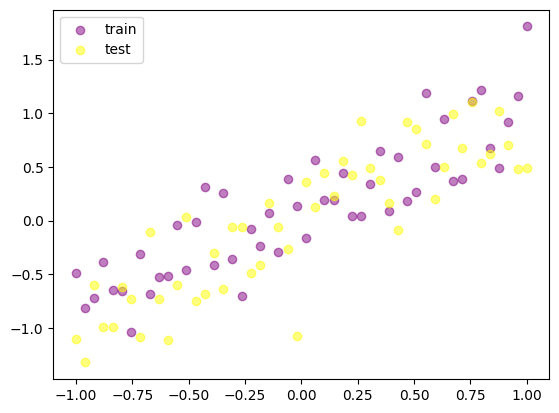

In [46]:
plt.scatter(x_train.data.numpy(), y_train.data.numpy(), c = "purple",
            alpha = 0.5, label = 'train')
plt.scatter(x_test.data.numpy(), y_test.data.numpy(), c = 'yellow',
            alpha = 0.5, label = 'test')
plt.legend()
plt.show()

In [47]:
N_h = 100
model = torch.nn.Sequential(
    torch.nn.Linear(1, N_h),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, N_h),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, 1),
)

model_dropout = torch.nn.Sequential(
    torch.nn.Linear(1, N_h),
    torch.nn.Dropout(0.2),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, N_h),
    torch.nn.Dropout(0.2),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, 1),
)

In [51]:
opt = torch.optim.Adam(model.parameters(), lr = 0.01)
opt_dropout = torch.optim.Adam(model_dropout.parameters(), lr = 0.01)
loss_fn = torch.nn.MSELoss()

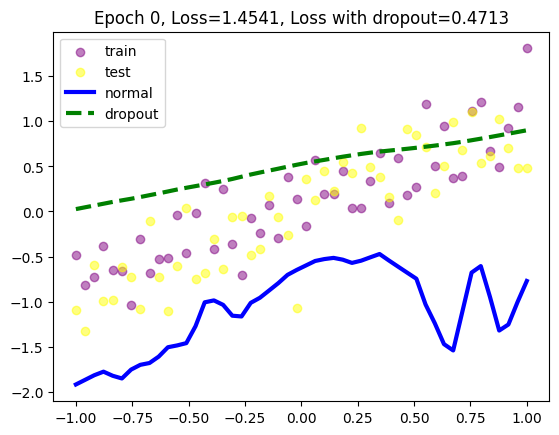

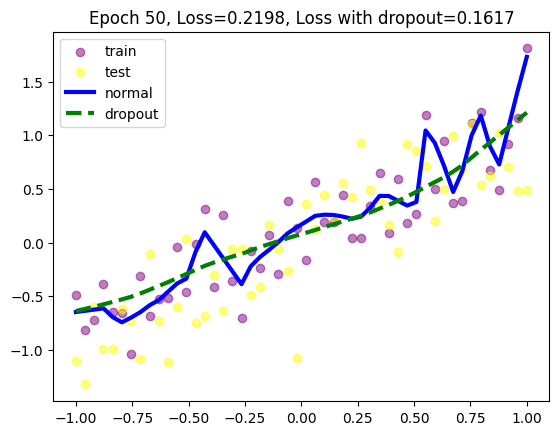

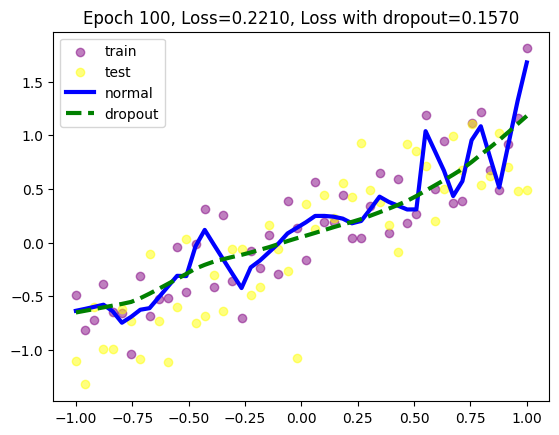

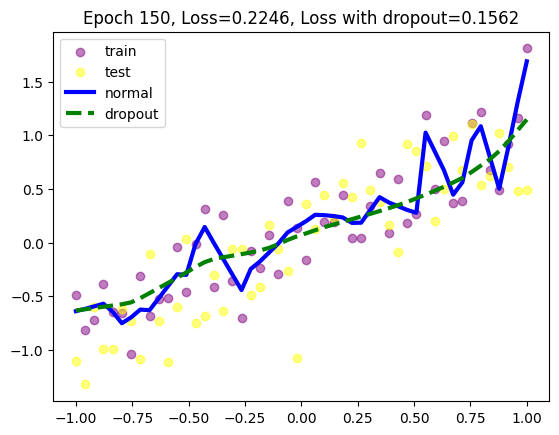

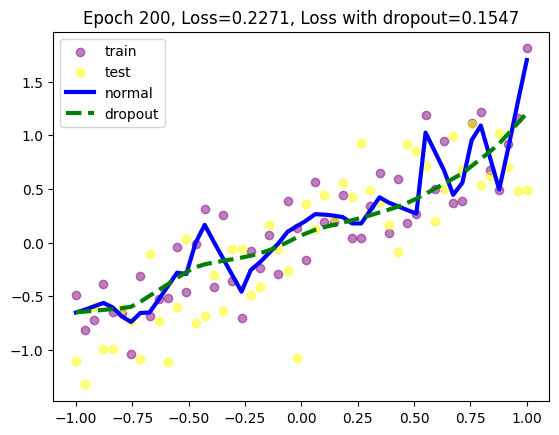

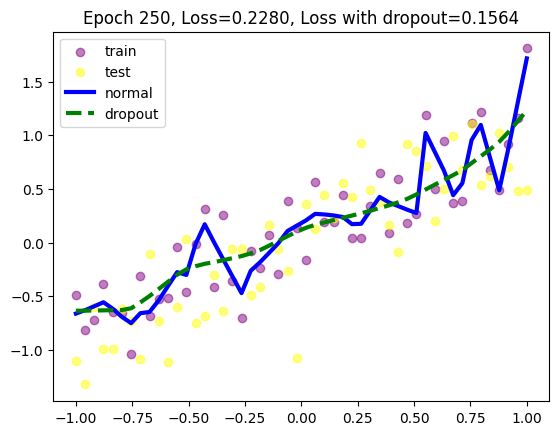

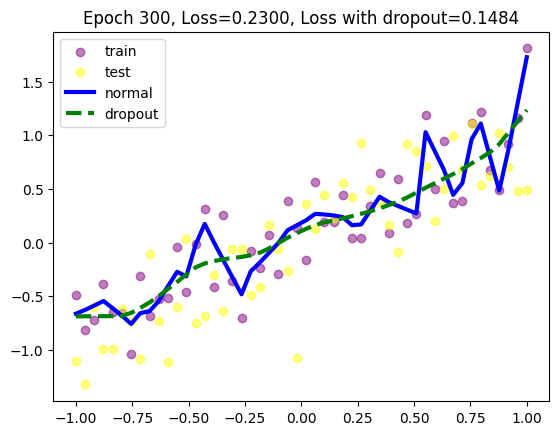

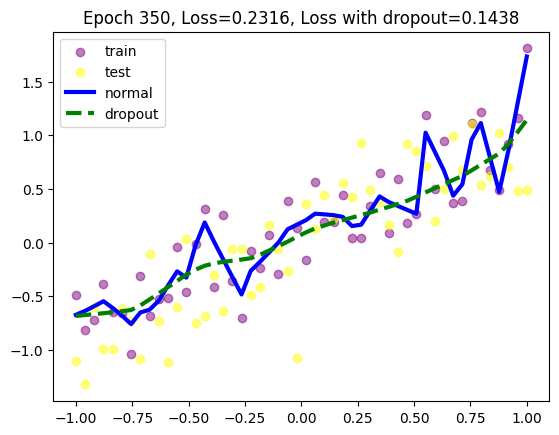

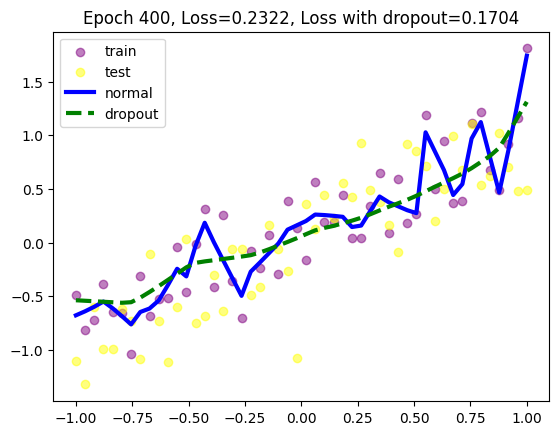

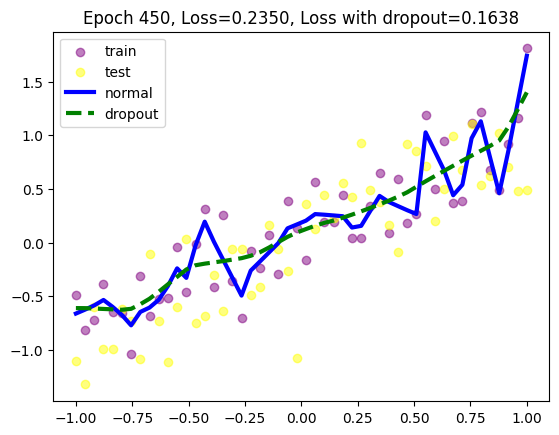

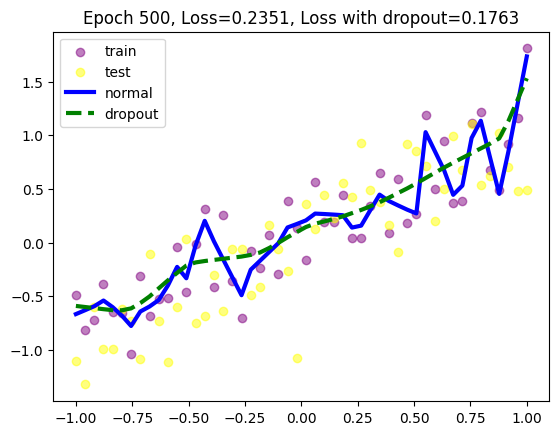

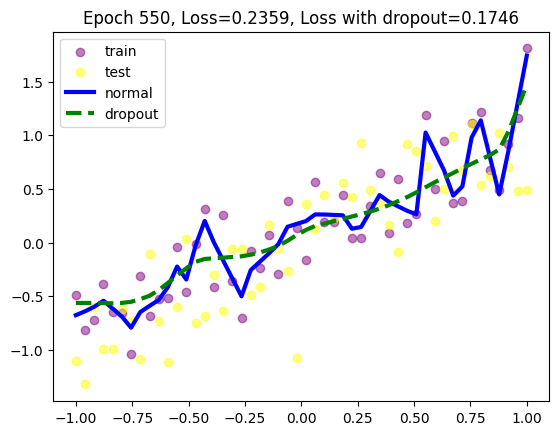

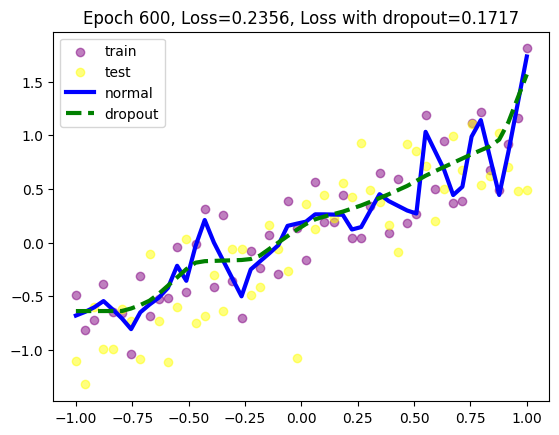

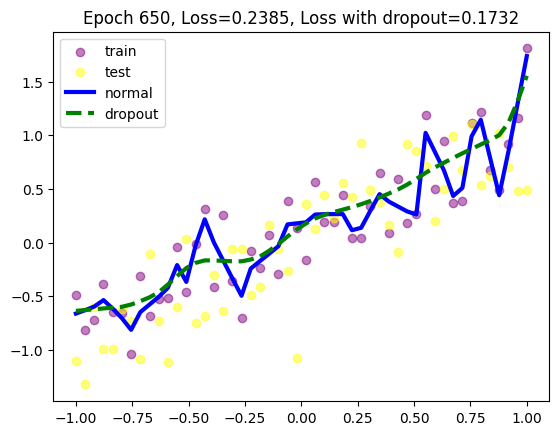

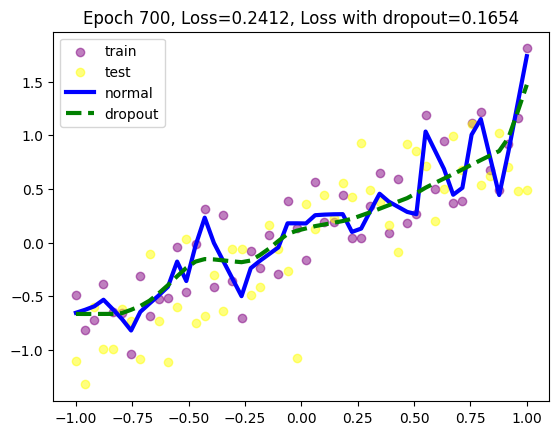

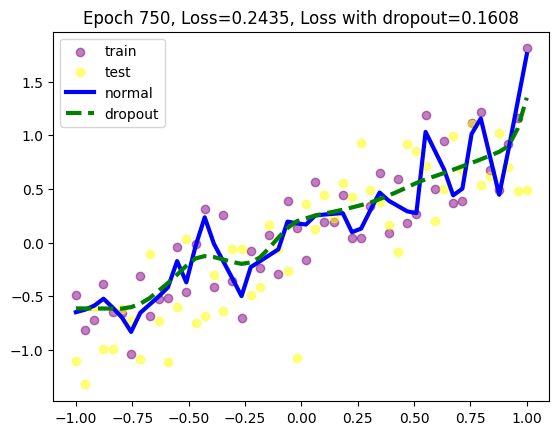

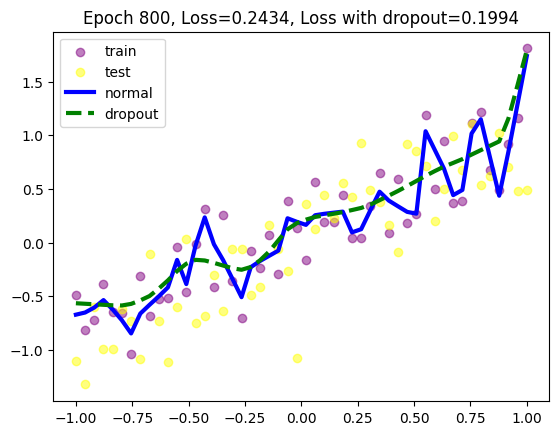

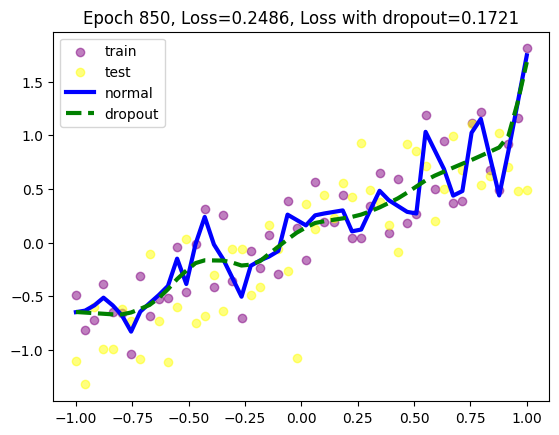

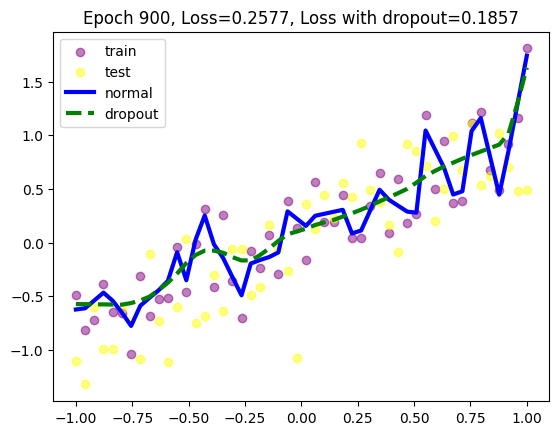

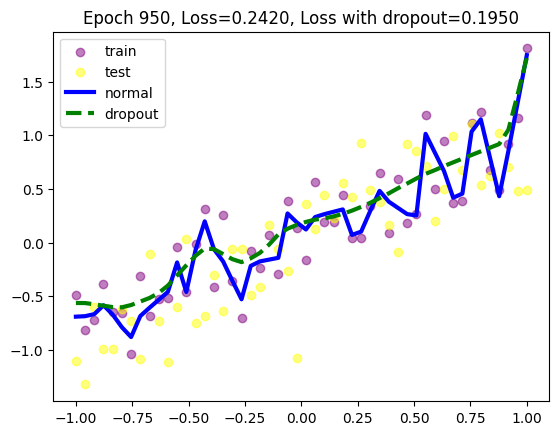

In [52]:
max_epochs = 1000
for epoch in range(max_epochs):
    pred = model(x_train)
    loss = loss_fn(pred, y_train)
    opt.zero_grad()
    loss.backward()
    opt.step()
    
    pred_dropout = model_dropout(x_train)
    loss_dropout = loss_fn(pred_dropout, y_train)
    opt_dropout.zero_grad()
    loss_dropout.backward()
    opt_dropout.step()
    
    if epoch % 50 == 0:
        model.eval()
        model_dropout.eval()
        
        test_pred = model(x_test)
        test_loss = loss_fn(test_pred, y_test)
        
        test_pred_dropout = model_dropout(x_test)
        test_loss_dropout = loss_fn(test_pred_dropout, y_test)
        
        plt.scatter(x_train.data.numpy(), y_train.data.numpy(), c = 'purple',
                    alpha = 0.5, label = 'train')
        plt.scatter(x_test.data.numpy(), y_test.data.numpy(), c= 'yellow',
                    alpha = 0.5, label = 'test')
        plt.plot(x_test.data.numpy(), test_pred.data.numpy(), 'b-', lw = 3, label = 'normal')
        plt.plot(x_test.data.numpy(), test_pred_dropout.data.numpy(), 'g--', lw = 3, label = 'dropout')
        plt.title("Epoch %d, Loss=%0.4f, Loss with dropout=%0.4f" %(epoch, test_loss, test_loss_dropout))
        plt.legend()
        model.train()
        model_dropout.train()
        plt.pause(0.05)

# 조기 종료를 이용한 성능 최적화

In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from torchvision import transforms, datasets

import matplotlib
import matplotlib.pyplot as plt
import time
import argparse
from tqdm import tqdm
matplotlib.style.use('ggplot')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [54]:
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.485, 0.456, 0.406], 
                         std = [0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.486, 0.456, 0.406],
                         std = [0.229, 0.224, 0.225])
])

In [55]:
train_dataset = datasets.ImageFolder(
    root = './data/archive/train/',
    transform = train_transform
)
train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size = 32, shuffle = True,
)

val_dataset = datasets.ImageFolder(
    root = './data/archive/test/',
    transform = val_transform
)
val_dataloader = torch.utils.data.DataLoader(
    val_dataset, batch_size = 32, shuffle = False
)

In [56]:
def resnet50(pretrained= True, requires_grad = False):
    model = models.resnet50(progress = True, pretrained = pretrained)
    if requires_grad == False:
        for param in model.parameters():
            param.requires_grad = False
    elif requires_grad == True :
        for param in model.parameters():
            param.requires_grad = True
    model.fc = nn.Linear(2048, 2)
    return model

In [57]:
class LRScheduler():
    def __init__(
        self, optimizer, patience = 5, min_lr = 1e-6, factor = 0.5
    ):
        self.optimizer = optimizer
        self.patience = patience
        self.min_lr = min_lr
        self.factor = factor
        self.lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
            self.optimizer,
            mode = 'min',
            patience = self.patience,
            factor = self.factor,
            min_lr = self.min_lr,
            verbose = True
        )
        
    def __call__(self, val_loss):
        self.lr_scheduler.step(val_loss)

In [58]:
class EarlyStopping():
    def __init__(self, patience = 5, verbose = False, delta = 0, path = './data/checkpoint.pt'):
        self.patience = patience
        self.counter= 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        
    def __call__(self, val_loss, model):
        score = -val_loss
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else :
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0
    
    def save_checkpoint(self, val_loss, model):
        if self.verbose:
            print(f"Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}). Saving model ...")
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss